# Business Objective

### To create Customer cluster to identify the different types of customers.

# Purpose

### The obtained clusters help to identify those customers who would be interested in certain products, offers and services. 

# Importance

### The store may strategize its offerings in such a way that it targets only right customers for specific products.

In [1]:
#Importing libraries
import pandas as pd                                                   #Reading the file and creating Dataframes.
import numpy as np                                                    #For printing the range of numbers.

#Visualization
import matplotlib.pyplot as plt                                       #Visualizations for performing EDA
import seaborn as sns                                                 #Visualizations for performing EDA

from sklearn.preprocessing import LabelEncoder, MinMaxScaler          #Feature engineering
from sklearn.cluster import KMeans                                    #KMeans model building
import scipy.cluster.hierarchy as sch                                 #hierarchical clustering
from sklearn.cluster import AgglomerativeClustering                   #for model building
from sklearn.cluster import DBSCAN                                    #Buiting the DBSCAN model
from sklearn import metrics                                           #metrics for finding errors
#filter warnings
import warnings                                                       #Filtering the warnings
warnings.filterwarnings('ignore')                         

In [2]:
#Reading the file
customers_df= pd.read_csv('D:\data science\level_3\coarse_2\project_3\DS3_C6_S3_MallCustomers_Data_Project.csv')
customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Checking shape of data
customers_df.shape

(200, 5)

The data consists of 5-Features and 200 rows.

In [4]:
#checking the null values
customers_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values present in the data. No need for missing value treatment.

In [5]:
#Describing the data
customers_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


As all the datapoints range is closer, no need for scaling the data.

In [6]:
#Checking the datatype of ecach feature
customers_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Only one column i.e., Gender is in object type. Remaining all features are of intiger type.

In [7]:
#Duplicating the data
new_customers_df= customers_df.copy()

In [8]:
#considering only numerical columns for model building
customers_df1= customers_df.select_dtypes(exclude='object')
customers_df1.head(3)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6


Considering only the numerical columns for model building.

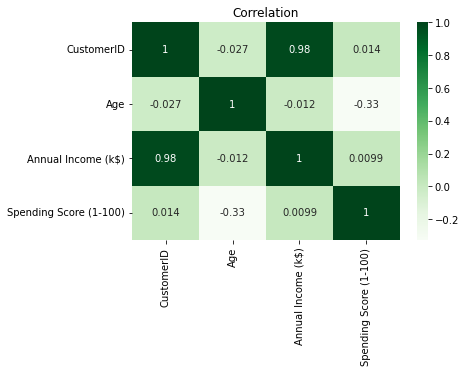

In [9]:
#Finding correlation of each features
corr= customers_df1.corr()
sns.heatmap(corr, annot=True, fmt='.2g',cmap='Greens')
plt.title('Correlation')
plt.show()

Correlation map for checking the relationship between each parameters.

# EDA

<AxesSubplot:xlabel='Gender', ylabel='count'>

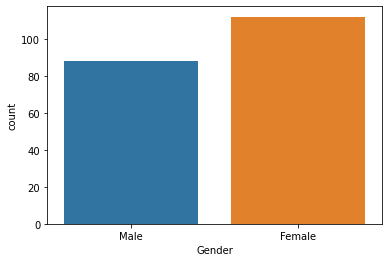

In [10]:
#count of customers gender wise
sns.countplot(customers_df['Gender'])

There are more number of Female customers as compared to male customers.

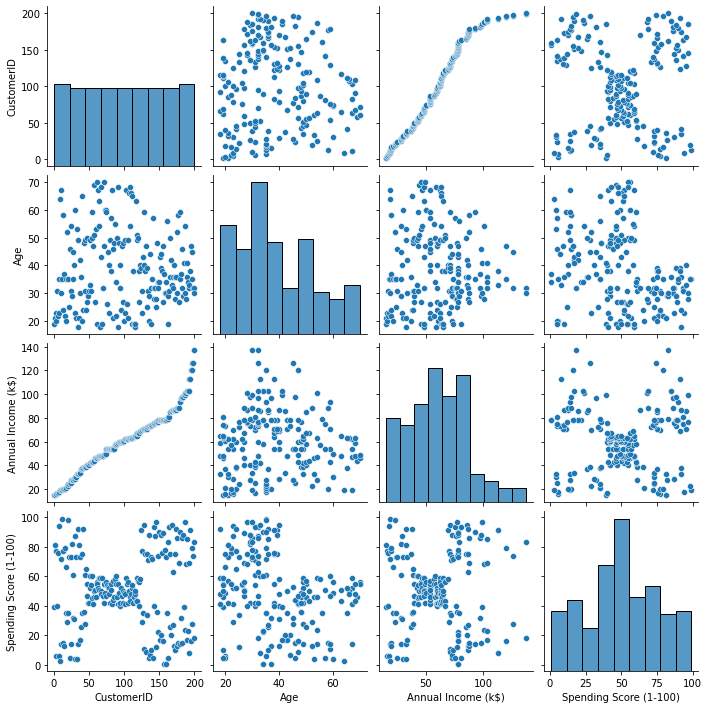

In [11]:
#pairplot for all numerical columns
sns.pairplot(customers_df)

As the data is fluctuated, there should be some deep analysis and deep mining required.

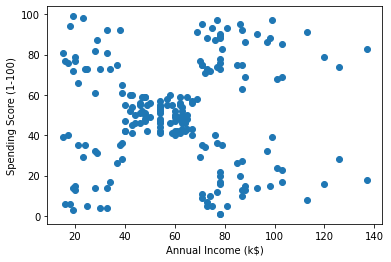

In [12]:
#Plotting annual_income and spending_score
plt.scatter(x=customers_df['Annual Income (k$)'], y=customers_df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

From this graph we can see all types of customers are present in the mall data i.e.,

customers having low income and low spending scores

customers having low income and high spending scores

customers having high income and low spending scores

customers having low income and high spending scores

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

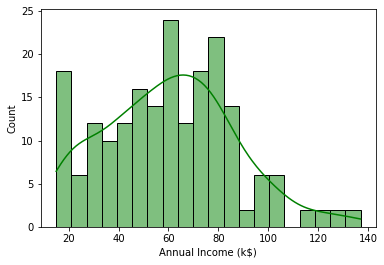

In [13]:
#histogram for income of customers
sns.histplot(customers_df['Annual Income (k$)'], bins=20,kde=True,color='g')

The most of the customers annual income is ranging bettween 60$ and 80$.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

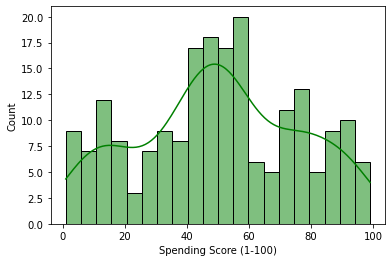

In [14]:
#histogram for spending_scores of customers
sns.histplot(customers_df['Spending Score (1-100)'], bins=20,kde=True,color='g')

Most of the customers spending score is ranging between 40-60.

<AxesSubplot:xlabel='Age', ylabel='Count'>

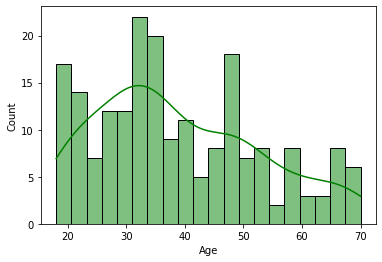

In [15]:
#histogram for age
sns.histplot(customers_df['Age'], kde=True, bins=20, color='g')

Most of the visitors/customers having age between 30-40.

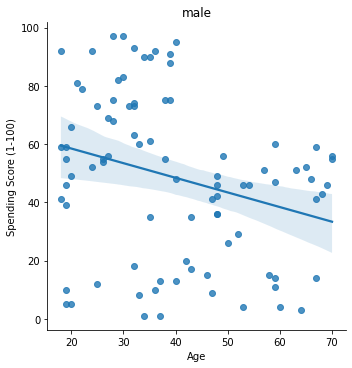

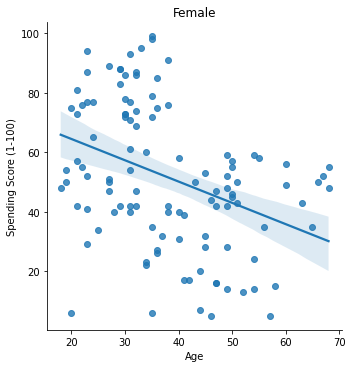

In [16]:
#checking spending scores, age w.r.t Gender
#Filtering data as male and female
male= customers_df[customers_df.Gender=='Male']
female= customers_df[customers_df.Gender=='Female']

sns.lmplot(x='Age', y='Spending Score (1-100)', data=male,).set(title='male')
sns.lmplot(x='Age', y='Spending Score (1-100)', data=female).set(title='Female')

Spending scores are gradually decreasing as age increasing in both male and females.

# Clustering with different models

# KMeans clustering

In [17]:
#considering annual income and spending score of customers
X= customers_df[['Annual Income (k$)', 'Spending Score (1-100)']]

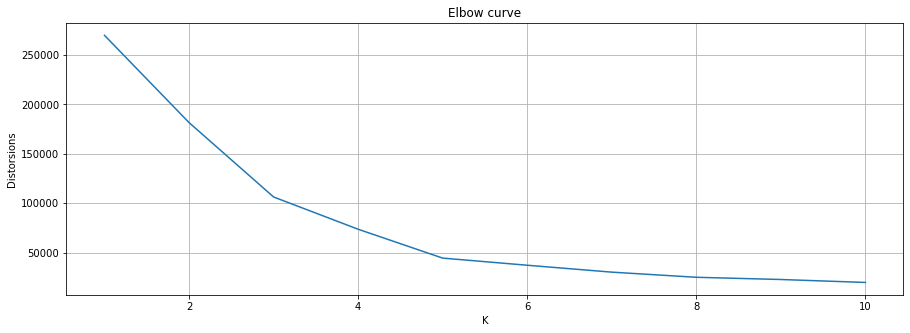

In [18]:
#Finding the optimum value of K
distorsions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(1, 11), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve');

From the graph we can see, from K=5 the errors are decreasing. so, it can be considered as elbow point.

For n_clusters = 2 The average silhouette_score is : 0.2968969162503008
For n_clusters = 3 The average silhouette_score is : 0.46761358158775435
For n_clusters = 4 The average silhouette_score is : 0.4931963109249047
For n_clusters = 5 The average silhouette_score is : 0.553931997444648
For n_clusters = 6 The average silhouette_score is : 0.5376203956398481
For n_clusters = 7 The average silhouette_score is : 0.5270287298101395


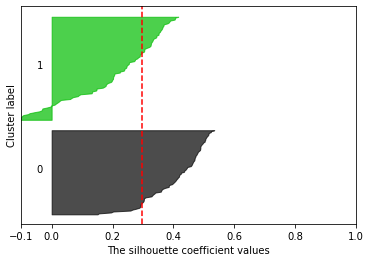

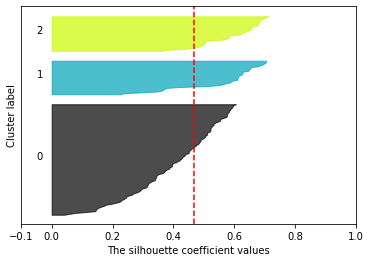

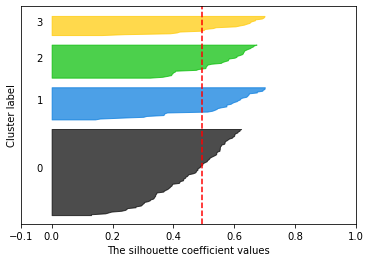

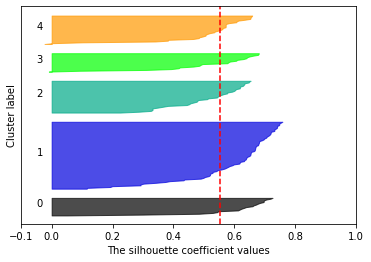

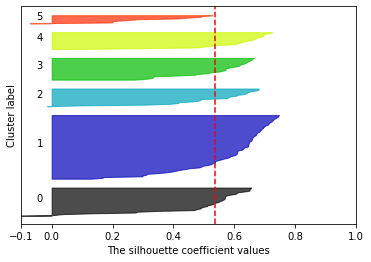

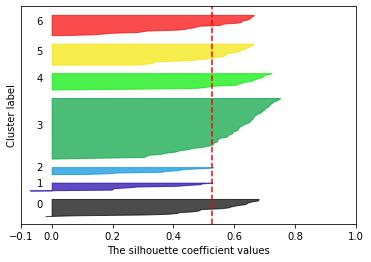

In [19]:
#Finding optimum values of K using silhouette scores
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

The silhouette_score is maximum when number_of_clusters=5. We can consider K=5 for KMeans model building.

In [20]:
#model building
model1= KMeans(n_clusters=5, random_state=1)

#training the data
model1.fit(X)

KMeans(n_clusters=5, random_state=1)

As silhoutte score is max when number of clusters=5, considering K=5.

In [21]:
#appending labels to dataframe
X['labels']= model1.labels_
X

,Annual Income (k$),Spending Score (1-100),labels
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,1
197,126,74,3
198,137,18,1


Appending the labels to the dataframe

In [22]:
#centroids
cluster_centroids= model1.cluster_centers_
cluster_centroids

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

As we are forming 5-clusters, there are 5-centroids.

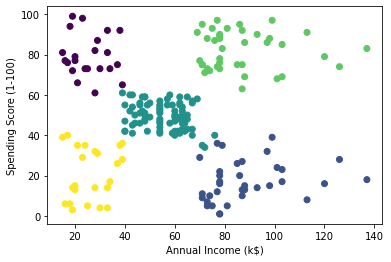

In [23]:
#visualizing the clusters
plt.scatter(x= X['Annual Income (k$)'], y= X['Spending Score (1-100)'], c=X['labels'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Clusters which are formed by KMeans model are accurate.

we can easily differentiate the customers based on the annual income and spending scores using KMeans model.

# Hierarchical Clustering

In [24]:
#considering AnnualIncome and Spending scores.
X = customers_df.iloc[:, [3, 4]].values

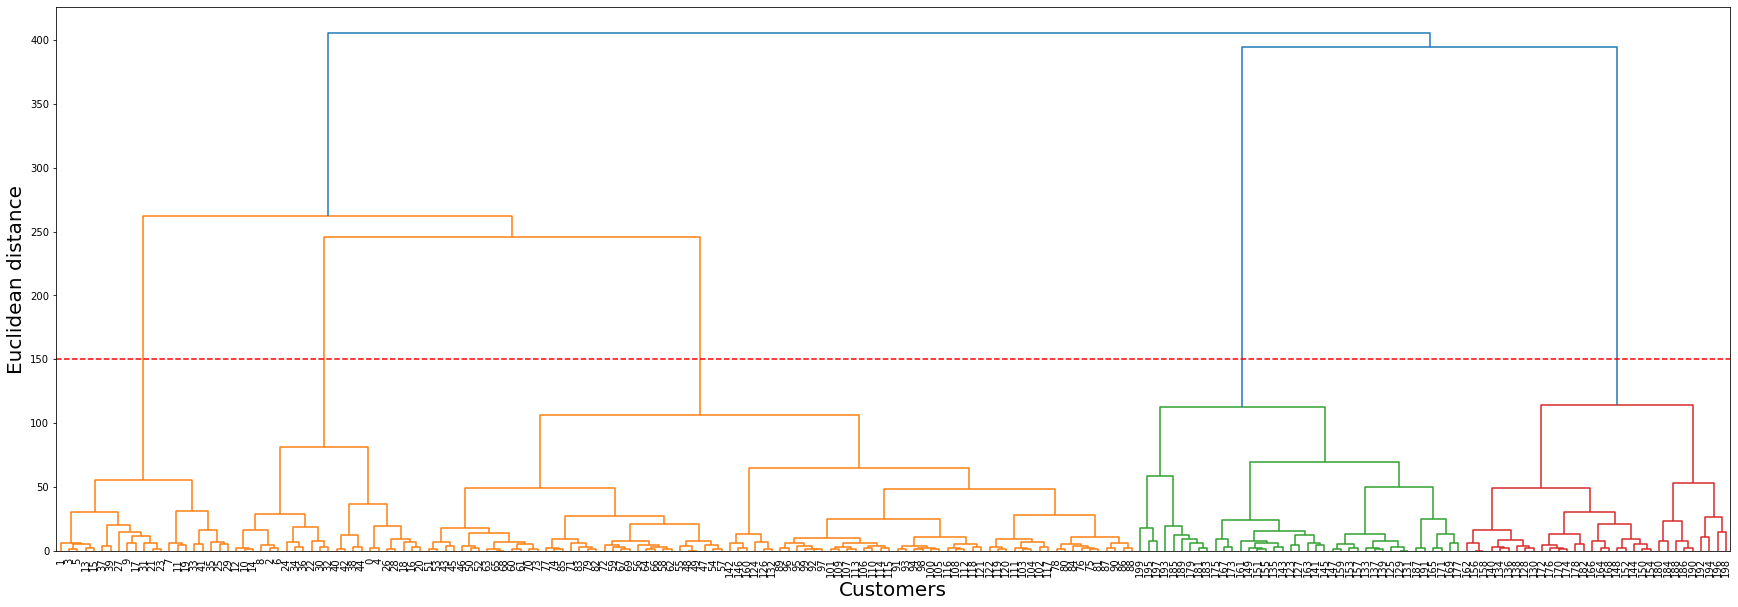

In [25]:
#Plotting Dendrogram
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=customers_df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The vertical line with maximum distance is blue line and hence deciding threshold of 150 and cutting the Dengrogram.

Here the line is passing through 5-paths. so, considering number of clusters=5.

In [26]:
#model building using Agglomerative model
model2= AgglomerativeClustering(n_clusters=5)

#predicting the values
y_pred2= model2.fit_predict(X)

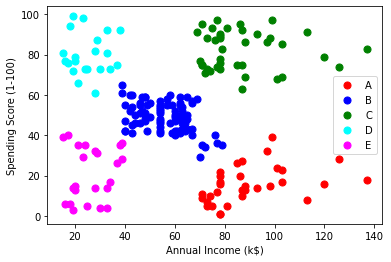

In [27]:
plt.scatter(X[y_pred2 == 0, 0], X[y_pred2 == 0, 1], s = 50, c = 'red', label = 'A')
plt.scatter(X[y_pred2 == 1, 0], X[y_pred2 == 1, 1], s = 50, c = 'blue', label = 'B')
plt.scatter(X[y_pred2 == 2, 0], X[y_pred2 == 2, 1], s = 50, c = 'green', label = 'C')
plt.scatter(X[y_pred2 == 3, 0], X[y_pred2 == 3, 1], s = 50, c = 'cyan', label = 'D')
plt.scatter(X[y_pred2 == 4, 0], X[y_pred2 == 4, 1], s = 50, c = 'magenta', label = 'E')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The clusters formed by hierarchical clustering are accurate and easy to identify.

I have named the clusters as A,B,C,D,E:

where,
In cluster-A, The customers annual income is high and spending scores are less.

In cluster-B, The customers have moderately annual income and moderately spending scores.

In cluster-C, The customers annual income is high and spending scores are also high.

In cluster-D, The customers annual income is less and spending scores are high.

In cluster-E, The customers annual income is less and spending scores are also less.

# DBSCAN

In [28]:
#considering AnnualIncome and Spending scores.
X1 = customers_df.iloc[:, [3, 4]]
X1

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [29]:
#defining the model
model3= DBSCAN()

#training the model
model3.fit(X1)

DBSCAN()

In [30]:
#Finding optimum values of hyperparameters
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X1[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(X1)

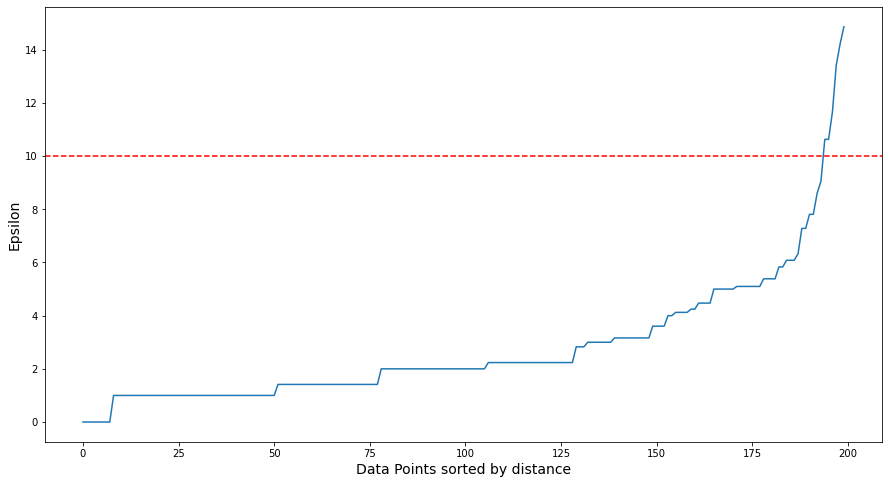

In [31]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=10, color='r', linestyle='--')
#plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

From epsilon 10, there is no gradual change in the error. so, considering epsilon values as 10.

In [32]:
#considering eps=10, and finding min_samples required for better clusters to obtain
eps=10
for min_samples in [7,8,9,10,11,12,13,14,15]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X1)

    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]))
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 10 | min_samples=  7 | obtained clustering:  [(1, 23), (2, 12), (3, 16), (4, 95), (5, 31), (6, 23)]
eps= 10 | min_samples=  8 | obtained clustering:  [(1, 38), (2, 14), (3, 8), (4, 90), (5, 28), (6, 22)]
eps= 10 | min_samples=  9 | obtained clustering:  [(1, 53), (2, 12), (3, 87), (4, 26), (5, 22)]
eps= 10 | min_samples=  10 | obtained clustering:  [(1, 54), (2, 11), (3, 87), (4, 26), (5, 22)]
eps= 10 | min_samples=  11 | obtained clustering:  [(1, 58), (2, 11), (3, 84), (4, 26), (5, 13), (6, 8)]
eps= 10 | min_samples=  12 | obtained clustering:  [(1, 79), (2, 84), (3, 12), (4, 25)]
eps= 10 | min_samples=  13 | obtained clustering:  [(1, 91), (2, 84), (3, 25)]
eps= 10 | min_samples=  14 | obtained clustering:  [(1, 102), (2, 83), (3, 15)]
eps= 10 | min_samples=  15 | obtained clustering:  [(1, 102), (2, 83), (3, 15)]


when eps=10, and min_samples=10, the number sof clusters obtained are 5.

In [33]:
#considering eps=10, min_samples=10 and building the model

from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=10,min_samples=10)
dbscan_opt.fit(X1)

DBSCAN(eps=10, min_samples=10)

In [34]:
#Appending the labels to the dataframe
X1['DBSCAN_opt_labels']=dbscan_opt.labels_
X1['DBSCAN_opt_labels'].value_counts()

 1    87
-1    54
 2    26
 3    22
 0    11
Name: DBSCAN_opt_labels, dtype: int64

These are unique clusters formed.

In [35]:
X1.head(10)

,Annual Income (k$),Spending Score (1-100),DBSCAN_opt_labels
0,15,39,-1
1,15,81,-1
2,16,6,-1
3,16,77,0
4,17,40,-1
5,17,76,0
6,18,6,-1
7,18,94,-1
8,19,3,-1
9,19,72,0


These are labels obtained by DBSCAN models.

Silhouette Coefficient: 0.305


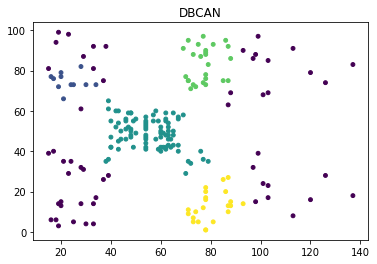

In [36]:
#visualozing the clusters formed
plt.scatter(X1['Annual Income (k$)'], X1['Spending Score (1-100)'], c=X1['DBSCAN_opt_labels'],cmap='viridis',s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X1, X1['DBSCAN_opt_labels']))
plt.title('DBCAN')
plt.show()

The clusters formed by DBSCAN model are not accurate. All the clusters are mixed up.

### For this dataset, we can consider either KMeans or heirarchical clustering model for obtaining the better clusters of the customers.

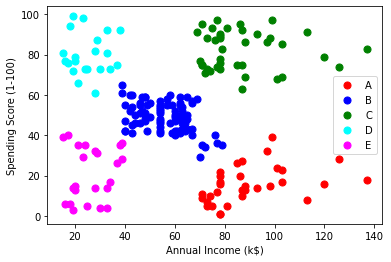

In [37]:
plt.scatter(X[y_pred2 == 0, 0], X[y_pred2 == 0, 1], s = 50, c = 'red', label = 'A')
plt.scatter(X[y_pred2 == 1, 0], X[y_pred2 == 1, 1], s = 50, c = 'blue', label = 'B')
plt.scatter(X[y_pred2 == 2, 0], X[y_pred2 == 2, 1], s = 50, c = 'green', label = 'C')
plt.scatter(X[y_pred2 == 3, 0], X[y_pred2 == 3, 1], s = 50, c = 'cyan', label = 'D')
plt.scatter(X[y_pred2 == 4, 0], X[y_pred2 == 4, 1], s = 50, c = 'magenta', label = 'E')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

I have named the clusters as A,B,C,D,E:

where,
In cluster-A, The customers annual income is high and spending scores are less.

In cluster-B, The customers have moderately annual income and moderately spending scores.

In cluster-C, The customers annual income is high and spending scores are also high.

In cluster-D, The customers annual income is less and spending scores are high.

In cluster-E, The customers annual income is less and spending scores are also less.

As the spending score and annual income is more in cluster-E, we can provide more offers to the customers belonging to cluster-E.

For the cluster-A, as their income is more and less spending score. we can provide more offers to the customers belonging to cluster-A, so that these customers increase spending scores.